In [1]:
import os

import pandas as pd
import seaborn as sns
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
os.chdir('drive/MyDrive/ШИФТ')

In [3]:
df = pd.read_csv('wine.csv')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol quality  
0      9.4     bad  
1      9.8     bad  
2      9.8     bad  
3      9.8    good  
4      9.4     bad

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [5]:
df.select_dtypes(include='object').head()

quality
0     bad
1     bad
2     bad
3    good
4     bad

In [6]:
df.select_dtypes(include='object')['quality'].value_counts()

quality
good    855
bad     744
Name: count, dtype: int64

In [7]:
#Бинаризуем качество
df['quality'] = df['quality'].apply(lambda x: 1 if x == 'good' else 0)

In [8]:
X = df.drop('quality', axis=1)
y = df['quality']

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn import tree

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

Bagging trees

In [11]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score, roc_auc_score

In [17]:
tree_clf = DecisionTreeClassifier(max_depth=10, random_state=27)
bagging_clf = BaggingClassifier(base_estimator=tree_clf, n_estimators=100, random_state=0, max_features=0.7)
bagging_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                        random_state=27),
                  n_estimators=100, random_state=0)

In [18]:
print(f'train: {roc_auc_score(y_train, bagging_clf.predict_proba(X_train)[:, 1])}',
      f'test: {roc_auc_score(y_test, bagging_clf.predict_proba(X_test)[:, 1])}')

train: 0.99919261822376 test: 0.8686987615559044


In [13]:
print(f'train: {roc_auc_score(y_train, bagging_clf.predict_proba(X_train)[:, 1])}',
      f'test: {roc_auc_score(y_test, bagging_clf.predict_proba(X_test)[:, 1])}')

train: 0.9209464891125791 test: 0.8393656607942321


In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=27)
bagging_clf = BaggingClassifier(base_estimator=tree_clf, n_estimators=100, random_state=0,
                                max_features=0.7)
bagging_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                        random_state=27),
                  max_features=0.7, n_estimators=100, random_state=0)

In [ ]:
print(f'train: {roc_auc_score(y_train, bagging_clf.predict_proba(X_train)[:, 1])}',
      f'test: {roc_auc_score(y_test, bagging_clf.predict_proba(X_test)[:, 1])}')

train: 0.8671280276816611 test: 0.8280568637711495


Random forest (=bagging trees + bootstrap features)

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rf_clf = RandomForestClassifier(max_depth=3, n_estimators=50, random_state=27, max_features=0.7)
rf_clf.fit(X_train, y_train)
print(f'train: {roc_auc_score(y_train, rf_clf.predict_proba(X_train)[:, 1])}',
      f'test: {roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1])}')

train: 0.8566582782845759 test: 0.8214794464794465


In [ ]:
rf_clf = RandomForestClassifier(max_depth=3, n_estimators=50, random_state=27)
rf_clf.fit(X_train, y_train)
print(f'train: {roc_auc_score(y_train, rf_clf.predict_proba(X_train)[:, 1])}',
      f'test: {roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1])}')

train: 0.8566425500681556 test: 0.8204110704110704


In [27]:
rf_clf.feature_importances_

array([0.01883862, 0.13107715, 0.00517208, 0.00376188, 0.01417789,
       0.01209428, 0.05422521, 0.03542525, 0.01656077, 0.1647478 ,
       0.54391908])

Boosting

In [28]:
import xgboost as xgb
import lightgbm as lgbm

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [29]:
lgbm_clf = LGBMClassifier(max_depth=1, n_estimators=200)
lgbm_clf.fit(X_train, y_train)
print(f'train: {roc_auc_score(y_train, lgbm_clf.predict_proba(X_train)[:, 1])}',
      f'test: {roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1])}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 561, number of negative: 510
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000318 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 974
[LightGBM] [Info] Number of data points in the train set: 1071, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.523810 -> initscore=0.095310
[LightGBM] [Info] Start training from score 0.095310
train: 0.8726084373143197 test: 0.8214794464794464


In [30]:
lgbm_clf.feature_importances_

array([13, 28,  7,  6, 13,  3, 25, 16, 13, 35, 41], dtype=int32)

In [31]:
xgb_clf = XGBClassifier(max_depth=1, n_estimators=200)
xgb_clf.fit(X_train, y_train)
print(f'train: {roc_auc_score(y_train, xgb_clf.predict_proba(X_train)[:, 1])}',
      f'test: {roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])}')

train: 0.8981370801440006 test: 0.8233836269550555


In [32]:
xgb_clf.feature_importances_

array([0.03704311, 0.16956705, 0.02979582, 0.02820904, 0.03415342,
       0.02313277, 0.08838705, 0.02947289, 0.0362014 , 0.14689243,
       0.37714508], dtype=float32)

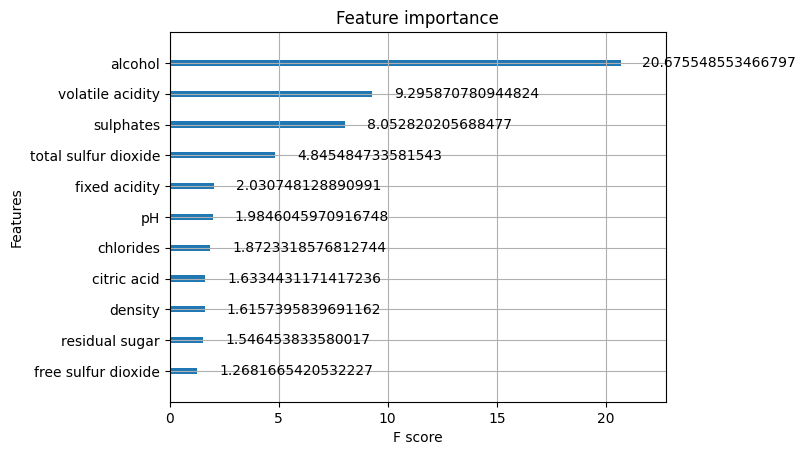

In [33]:
xgb.plot_importance(xgb_clf, importance_type='gain');

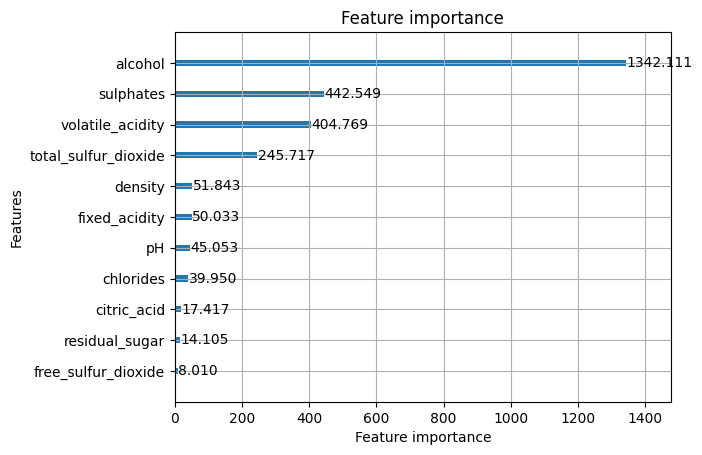

In [34]:
lgbm.plot_importance(lgbm_clf, importance_type='gain');

In [35]:
!pip install shap

In [36]:
import shap

In [37]:
shap.initjs()

model_type='lgbm'

explainer = shap.TreeExplainer(lgbm_clf)
shap_values = explainer.shap_values(X_test)

/usr/local/lib/python3.10/dist-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


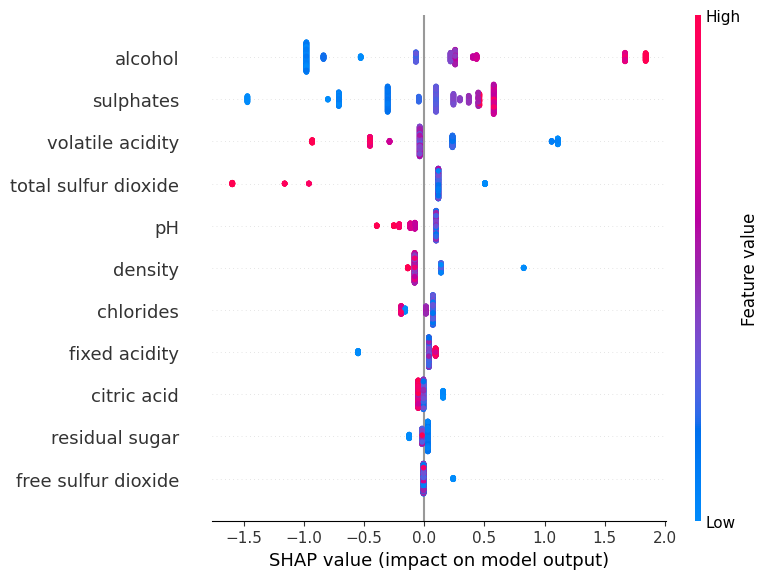

In [38]:
shap.summary_plot(shap_values, X_test, max_display=30)

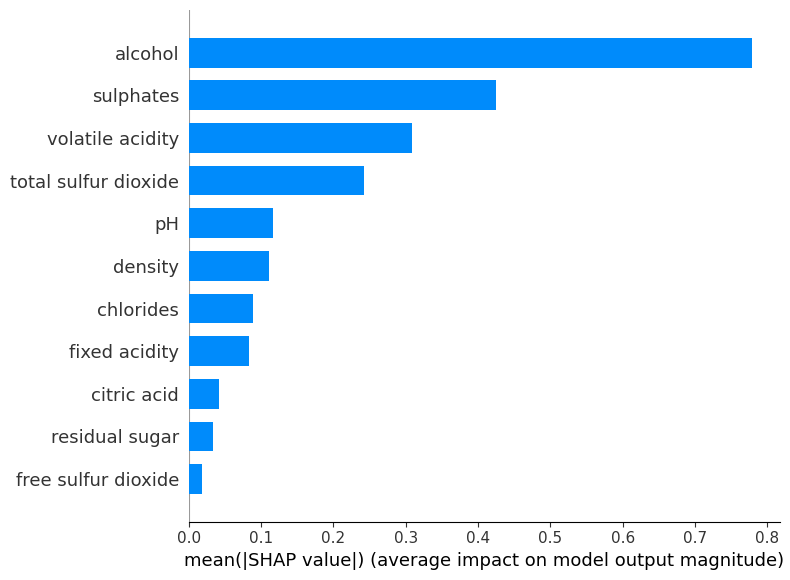

In [39]:
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=30)